<a href="https://colab.research.google.com/github/Gr-30/DL/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries/Dataset

## Import the required libraries and the dataset.

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Assignment1/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", engine="python")

## Check the GPU available 


In [4]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8525e0f8-ae02-c392-5def-400eecb34b4a)


# Data Visualization

## Print at least two movie reviews from each class of the dataset, for a sanity check that labels match the text.

In [5]:
data.columns = ["label", "time", "date", "query", "username", "text"]

Five top records

In [6]:
data.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Features of Data

In [7]:
data.columns

Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')

Data length

In [8]:
len(data)

1599999

Data Information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Checking Null values

In [10]:
np.sum(data.isnull().any(axis=1))

0

In [21]:
datag = data.groupby('label').size().reset_index(name='count')

In [22]:
print(datag)

   label   count
0      0  799999
1      4  800000


## Plot a bar graph of class distribution in a dataset. Each bar depicts the number of tweets belonging to a particular sentiment. 

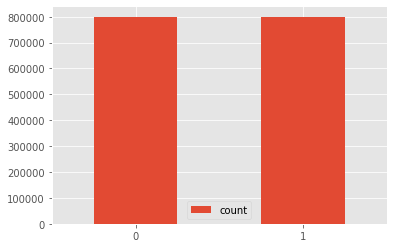

In [24]:
ax = datag.plot.bar(y='count', rot=0)

## Other visualizations

In [25]:
stopwords_ = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        collocations=False,
        background_color='white',
        stopwords=stopwords_,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

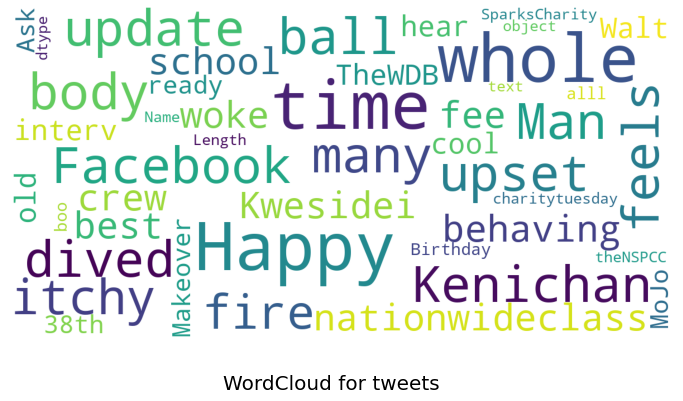

In [27]:
show_wordcloud(data['text'], "WordCloud for tweets")

## Print the shapes of train and test data.

In [ ]:
data.shape